<a href="https://colab.research.google.com/github/Notenkraker02/INVICTI/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization
### Instructions:
1. First run the sections "Functions" and "Final Model"
2. Proceed to "Run Final Model"


## Functions

In [2]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt
import yfinance
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from tabulate import tabulate


#Standard Deviation
def st_dev(weights, cov_matrix):
    variance = np.dot(weights.transpose(), np.dot(cov_matrix, weights))
    return np.sqrt(variance)

#Expected Return given weights
def exp_return(weights, returns):
    return np.sum(returns.mean() * weights)

#Sharpe Ratio
def sharpe_ratio(weights, returns, cov_matrix, rf_rate):
    return (exp_return(weights, returns) - rf_rate)/st_dev(weights, cov_matrix)

def getPortfolio(weights, returns, cov_matrix, rf_rate):
    return weights, exp_return(weights, returns), st_dev(weights, cov_matrix), sharpe_ratio(weights, returns, cov_matrix, rf_rate)

# Generate portfolios with random weights
def generate_random_portfolios(returns, covariance, num_portfolios, risk_free_rate):
    num_assets = returns.shape[1]
    portfolios = []

    for _ in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]  # Extract weights from the array
        returns_portfolio = exp_return(weights, returns)
        volatility_portfolio = st_dev(weights, covariance)
        sharpe_ratio_portfolio = sharpe_ratio(weights, returns, covariance, risk_free_rate)
        portfolios.append((weights, returns_portfolio, volatility_portfolio, sharpe_ratio_portfolio))

    return portfolios

# Plot the Efficient Frontier
def plot_efficient_frontier(portfolios, max_sharpe_portfolio):
    returns = [portfolio[1] for portfolio in portfolios]
    volatilities = [portfolio[2] for portfolio in portfolios]
    sharpe_ratios = [portfolio[3] for portfolio in portfolios]


    # Customizing color mapping to reflect full range of Sharpe ratios
    cmap = plt.get_cmap('viridis')
    colors = [cmap(sharpe_ratio) for sharpe_ratio in sharpe_ratios]

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(volatilities, returns, c=sharpe_ratios, cmap=cmap, marker='o')
    plt.scatter(max_sharpe_portfolio[2], max_sharpe_portfolio[1], color='red', marker='*', s=200, label='Max Sharpe Ratio Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')

    # Create color bar
    cbar = plt.colorbar(scatter, label='Sharpe Ratio')
    cbar.set_label('Sharpe Ratio')

    plt.legend()
    plt.grid(True)
    plt.show()

def plot_weight_allocation(portfolio, tickers, ax):
    optimal_weights = portfolio[0]
    ax.pie(optimal_weights, labels=tickers, autopct='%1.2f%%', startangle=140)
    ax.set_title('Portfolio Weights')


def plot_portfolio_comparison(max_sharpe_portfolio, tickers):
    def print_portfolio_stats(portfolio, tickers, ax, title):
        weights, returns, volatility, sharpe_ratio = portfolio

        # Create a DataFrame for asset allocation
        portfolio_df = pd.DataFrame({'Asset': tickers, 'Weight': weights})
        portfolio_df['Weight'] = portfolio_df['Weight'].map('{:.2%}'.format)

        # Print portfolio statistics
        ax.text(0, 1, f"{title} Portfolio Overview:", fontsize=14, fontweight='bold', transform=ax.transAxes)
        ax.text(0, 0.9, f"Expected Annual Return: {returns:.2%}", fontsize=12, transform=ax.transAxes)
        ax.text(0, 0.8, f"Volatility: {volatility:.2%}", fontsize=12, transform=ax.transAxes)
        ax.text(0, 0.7, f"Sharpe Ratio: {sharpe_ratio:.2f}", fontsize=12, transform=ax.transAxes)
        ax.text(0, 0.6, "Asset Allocation:", fontsize=12, fontweight='bold', transform=ax.transAxes)
        for i, (asset, weight) in enumerate(zip(tickers, weights)):
            ax.text(0, 0.55 - 0.05 * i, f"{asset}: {weight:.2%}", fontsize=10, transform=ax.transAxes)
        ax.axis('off')

    def show_portfolio(portfolio, ax, title):
        weights, _, _, _ = portfolio

        # Plot pie chart for asset allocation with customized style
        ax.pie(weights, labels=tickers, autopct='%1.2f%%', startangle=140)
        ax.set_title(f'Optimal Portfolio Weights ({title})')

    # Create figure and axes for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Plot pie chart
    show_portfolio(max_sharpe_portfolio, axes[0], "Max Sharpe Ratio")

    # Print portfolio statistics
    print_portfolio_stats(max_sharpe_portfolio, tickers, axes[1], "Max Sharpe Ratio")

    plt.show()

## Final Model

In [3]:
def optimalPortfolio(tickers, num_portfolios, startTime, endTime, risk_free_rate):
   # Obtain Assets
   assets = []
   for ticker in tickers:
      data = yfinance.download(ticker, startTime, endTime)['Close']
      assets.append(data)
   assets = pd.concat(assets, axis = 1, keys = tickers)
   assets = assets.fillna(method='ffill').fillna(method='bfill')
   if "CASH" not in tickers:
      assets["CASH"] = 1
      tickers.append("CASH")

   #Obtain Returns
   returns = np.log(assets / assets.shift(1)) *252
   returns = returns.dropna()
   covariance = returns.cov()/252

   #Obtain portfolios
   portfolios = generate_random_portfolios(returns, covariance, num_portfolios, risk_free_rate)
   max_sharpe_portfolio = max(portfolios, key=lambda x: x[3])

   return portfolios, max_sharpe_portfolio

##Run Final Model
### Instructions:
0. Make sure the sections "Functions" and "Final Model" have been executed.
1. In "tickers" add the tickers of the assets you want to consider.
2. Adjust "time_horizon" to change how much data from the past the model considers. With INVICTI, we agree to all use a timeframe of ... days/months/years.
3. Adjust "num_portfolios" for the number of portfolios the model generates (how many points there are in the graph). More points mean a more accurately weighted portfolio, but takes longer to run. 10,000 points should be enough and runs in about 15-25 seconds. But you can always consider more points.
4. The risk-free rate is set as a default to 0.035 (3.5%) from the 9-Month German Bond Yield. If this changes over time, we can manually adjust it. (Also feel free to play around)
5. Don't touch the rest of the code. 😀
6. Click the run button (▶) when you're ready.
7. Make some big bucks! 🤑

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


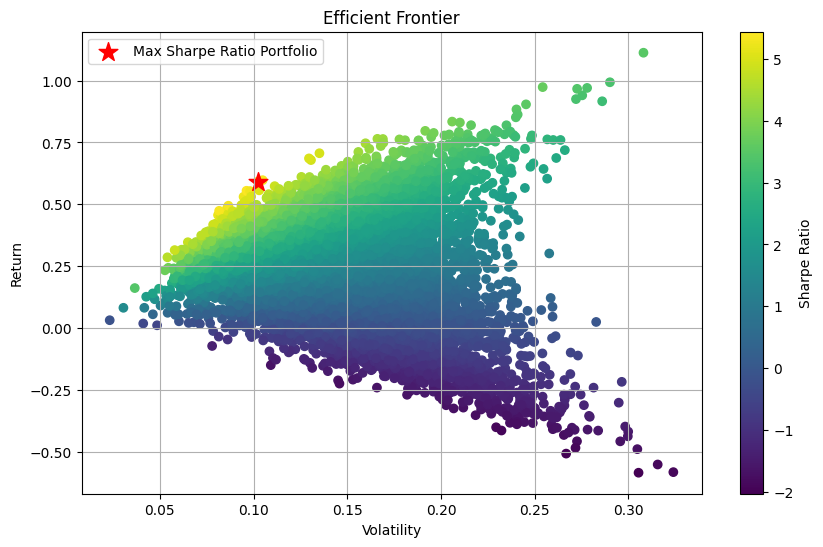

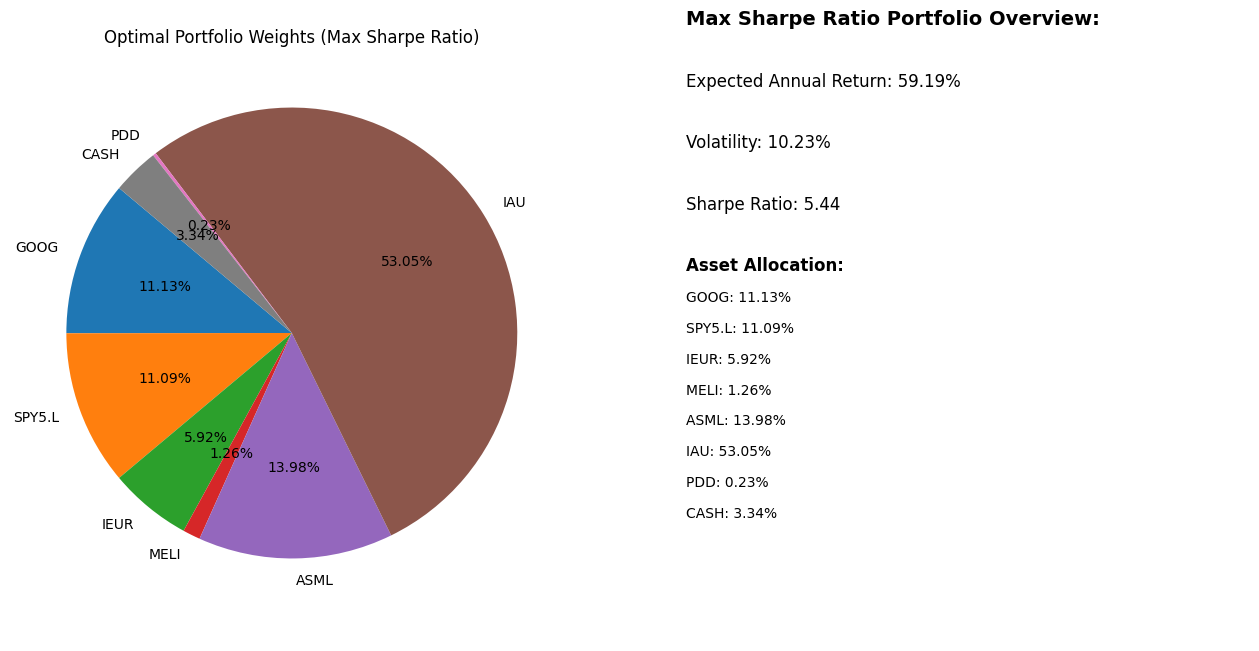

In [6]:
## Hyperparameters
tickers = ["GOOG", "SPY5.L", "IEUR", "MELI", "ASML", "IAU", "PDD"]
time_horizon = 90
num_portfolios = 10000
#Risk-free Rate
risk_free_rate = 0.035

# Interval Parameters
endTime = dt.datetime.now()
startTime = endTime - dt.timedelta(days = time_horizon)

#Perform model
portfolios, max_sharpe_portfolio = optimalPortfolio(tickers, num_portfolios, startTime, endTime, risk_free_rate)

# Plot efficient frontier
plot_efficient_frontier(portfolios, max_sharpe_portfolio)
plot_portfolio_comparison(max_sharpe_portfolio, tickers)